In [52]:
# importing all the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
# reading the csv file 
data = pd.read_csv('Responses.csv')


In [69]:
# removing rows with missing values
 data.dropna(inplace=True)

# questions
questions = {
    'degree': data["What type of degree are you currently pursuing?"],
    'faculty': data["What faculty is your program in? (Pick the option that closest resembles your program if the actual faculty is not listed)"],
    'age': data["What is your current age?"],
    'gpa': data["What is your current GPA percentage?"],
    'status': data["What is your status as a student?"],
    'used_chatgpt': data["Have you used ChatGPT yet?"],
    'impact_on_generation': data["Do you think the availability of ChatGPT will negatively impact newer generations?"],
    'reliable_source': data["Do you think ChatGPT can be used as a reliable source of information?"],
    'usage_situations': data["In which situations should students be allowed to use ChatGPT?"],
    'plagiarism': data["Would using ChatGPT be considered as plagiarism?"],
    'academic_performance': data["Do you think using ChatGPT will increase your academic performance (if the use of ChatGPT is allowed)?"],
}


In [65]:
# count occurrences based on conditions
def count_usage_by_faculty(faculty_name):
    return data[questions["faculty"] == faculty_name]['Have you used ChatGPT yet?'].value_counts().get('Yes - I have used ChatGPT', 0)
  


In [70]:
# count ChatGPT usage by faculty
faculties = ['Faculty of Science', 'Faculty of Law', 'Faculty of Business Studies', 'Athletics',
             'Faculty of Engineering', 'Faculty of Arts', 'Faculty of Health Sciences']

usage_counts = [count_usage_by_faculty(faculty) for faculty in faculties]



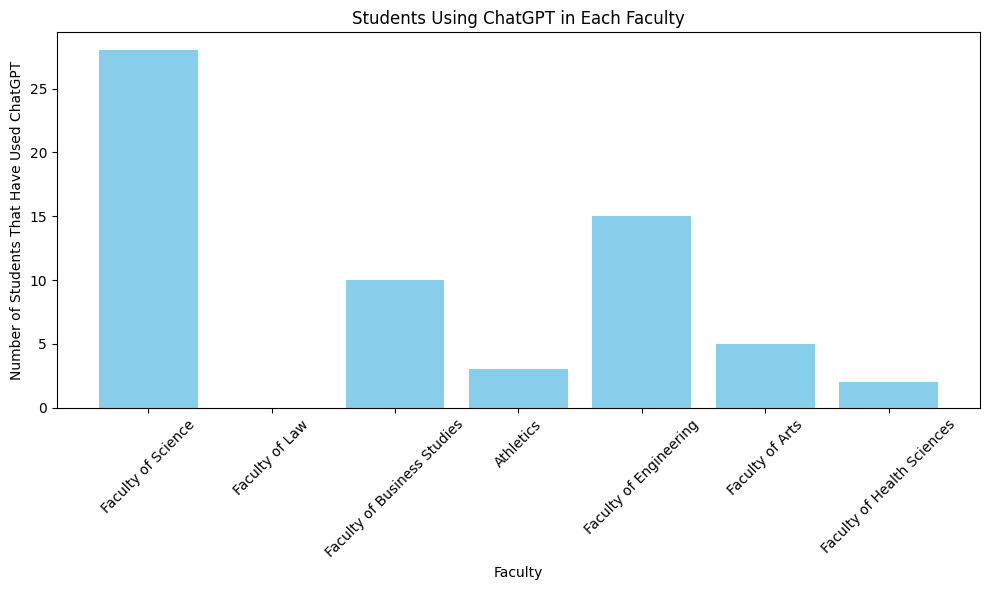

In [68]:
# graph plotting usage by faculty
plt.figure(figsize=(10, 6))
plt.bar(faculties, usage_counts, color='skyblue')
plt.ylabel('Number of Students That Have Used ChatGPT')
plt.xlabel('Faculty')
plt.title("Students Using ChatGPT in Each Faculty")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# count academic performance perceptions based on GPA ranges

def count_performance_by_gpa(gpa):
    return data[questions["gpa"] == gpa]['Do you think using ChatGPT will increase your academic performance (if the use of ChatGPT is allowed)?'].value_counts().get('Yes - ChatGPT will increase my academic performance', 0)



In [75]:
# performance perceptions by GPA ranges
gpa_ranges = ["Under 50%", "50% - 59%", "60% - 69%", "70% - 79%", "80% - 89%", "90% - 100%"]
performance_counts = [count_performance_by_gpa(i) for i in gpa_ranges]
print(performance_counts) 


[np.int64(2), np.int64(4), np.int64(4), np.int64(20), np.int64(20), np.int64(14)]


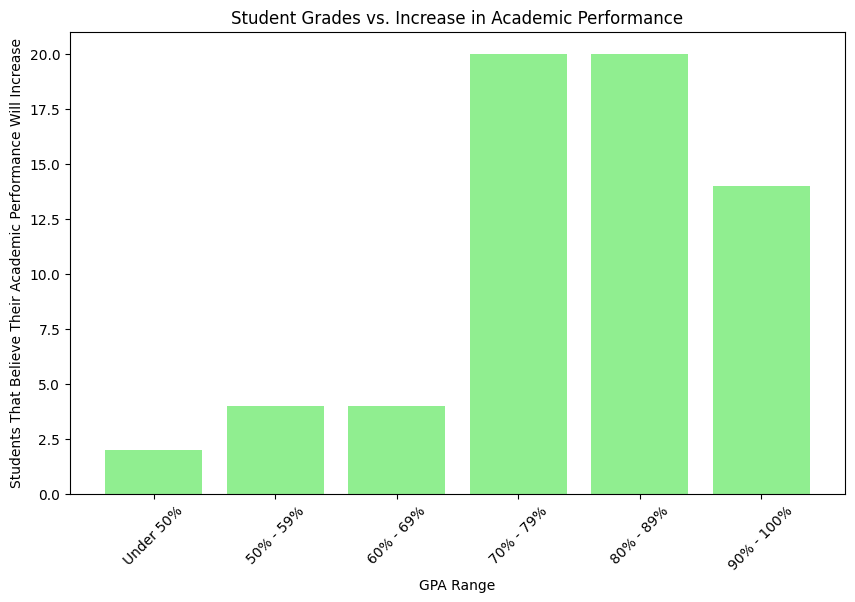

In [76]:
# plotting GPA performance perceptions
plt.figure(figsize=(10, 6))
plt.bar(gpa_ranges, performance_counts, color='lightgreen')
plt.ylabel('Students That Believe Their Academic Performance Will Increase')
plt.xlabel('GPA Range')
plt.title('Student Grades vs. Increase in Academic Performance')
plt.xticks(rotation=45)
plt.show()

In [77]:
# count ChatGPT reliability by faculty
def count_reliability_by_faculty(faculty_name, response):
    return ((questions['faculty'] == faculty_name) & (questions['reliable_source'] == response)).sum()

In [78]:
# count reliability responses
reliability_counts = {
    faculty: {
        "Yes": count_reliability_by_faculty(faculty, "Yes - it can be used as a reliable source of information"),
        "No": count_reliability_by_faculty(faculty, "No - it can't be used as a reliable source of information")
    }
    for faculty in faculties
}

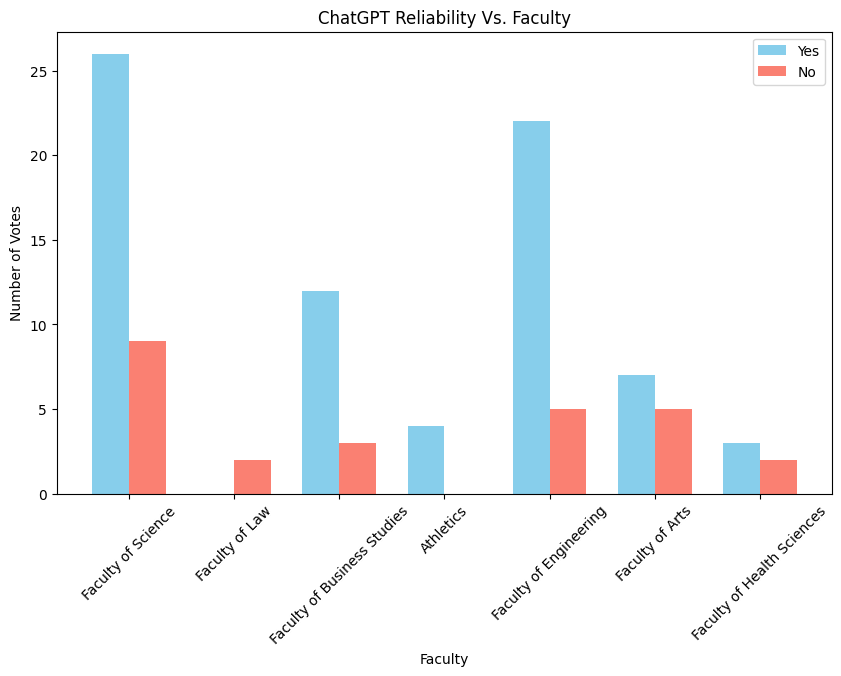

In [80]:
# plotting reliability by faculty
labels = list(reliability_counts.keys())
yes_counts = [counts["Yes"] for counts in reliability_counts.values()]
no_counts = [counts["No"] for counts in reliability_counts.values()]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, yes_counts, width, label='Yes', color='skyblue')
plt.bar(x + width/2, no_counts, width, label='No', color='salmon')

plt.ylabel('Number of Votes')
plt.xlabel('Faculty')
plt.title("ChatGPT Reliability Vs. Faculty")
plt.xticks(x, labels)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [108]:
# analyzing situations where ChatGPT should be allowed
op1 = questions['usage_situations'].str.contains("Brainstorming Ideas for Various Tasks (Essays, Homework, Assignments)", regex=False).sum()
op2 = questions['usage_situations'].str.contains("Self Learning (learning material taught by the University)", regex=False).sum()
op3 = questions['usage_situations'].str.contains("Completing Homework/Assignments assigned by the University").sum()
op4 = questions['usage_situations'].str.contains("Students, in under any circumstance, should not be allowed to use ChatGPT in academia").sum()


77


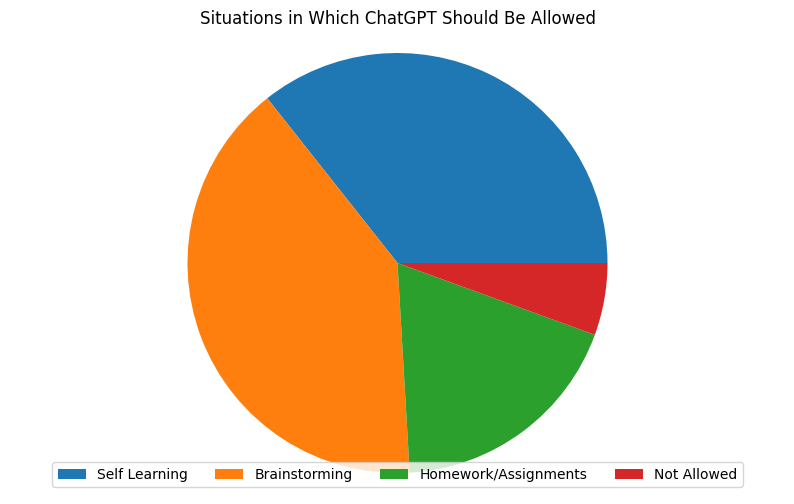

In [110]:
# plotting usage situations
plt.figure(figsize=(10, 6))
y = np.array([op1,op2,op3,op4])
plt.pie(y)
plt.title('Situations in Which ChatGPT Should Be Allowed')
mylabels = ['Self Learning', 'Brainstorming', 'Homework/Assignments', "Not Allowed"]

plt.legend(mylabels,loc='lower center',ncol=len(mylabels))


plt.axis('equal')  # ensures that pie is drawn as a circle.
plt.show()

In [111]:
# analyzing impact of ChatGPT on the newer generation
impact_counts = questions['impact_on_generation'].value_counts()

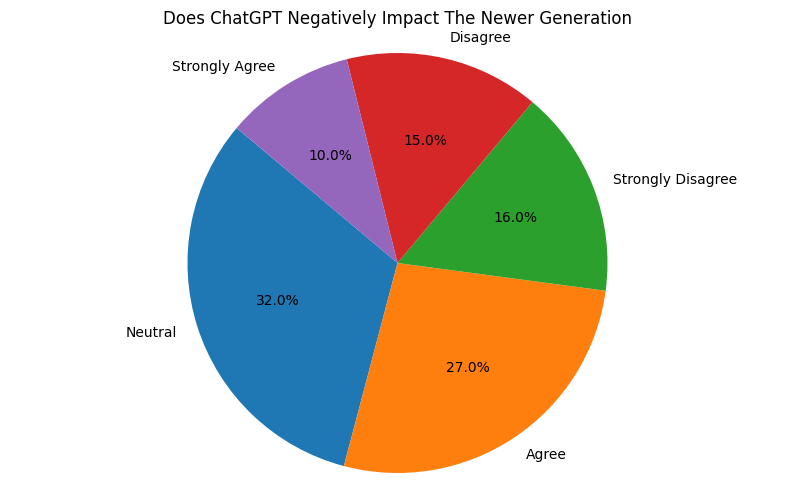

In [112]:
# plotting impact analysis
plt.figure(figsize=(10, 6))
plt.pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Does ChatGPT Negatively Impact The Newer Generation')
plt.axis('equal')
plt.show()

In [113]:
# analyzing plagiarism perceptions
plagiarism_counts = questions['plagiarism'].value_counts()

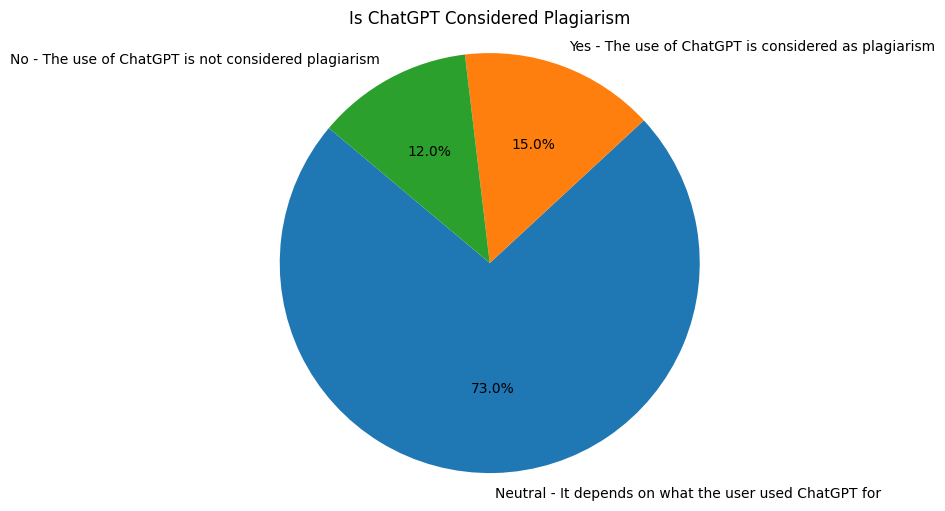

In [114]:
# plotting plagiarism perceptions
plt.figure(figsize=(10, 6))
plt.pie(plagiarism_counts, labels=plagiarism_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Is ChatGPT Considered Plagiarism')
plt.axis('equal')
plt.show()